In [1]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt


dir = r"D:\2024-01-03_ALC6_day1"
data_path = os.path.join(dir, '02-processed')
npy_path = os.path.join(dir, '00-npy files')
raw_path = os.path.join(dir, '01-raw')

In [12]:
mech_files = []
#01-raw contains folders for every experiment
experiments = [item for item in os.listdir(raw_path) if os.path.isdir(os.path.join(raw_path, item))]

for experiment in experiments:

    if experiment == '1-mechanical':
        #files_to_concat.append(path)
        recording_path = os.path.join(raw_path, experiment).replace('\\', '/')
        recordings = [item for item in os.listdir(recording_path) if os.path.isdir(os.path.join(recording_path, item))]
        recordings = sorted(recordings, key=lambda x: int(''.join(filter(str.isdigit, x))))

        for recording in recordings:
            path = os.path.join(recording_path, recording,'continuous','Neuropix-PXI-100.ProbeA-AP','continuous.dat').replace('\\', '/')
            mech_files.append(path)
    else:
        pass

sample_lengths = []
for file in mech_files:
    try:
        # Get the length of the binary data
        file_size = os.path.getsize(file)
        if file_size >= 4:
            sample_lengths.append((file_size/30000/385/2))
    except FileNotFoundError:
        print(f"File '{file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
mechDuration = np.median(sample_lengths)
sample_lengths = np.array(sample_lengths)
print(mechDuration)
print(sample_lengths[sample_lengths<3])

4.992
[1.6128     2.52586667]


In [14]:
files_to_concat = []

data_files = [item for item in os.listdir(npy_path)]
print(data_files)
print(len(data_files))

['mC_ai_data_100mN_20240104_094023_4.npy', 'mC_ai_data_100mN_20240104_094106_1.npy', 'mC_ai_data_100mN_20240104_094106_11.npy', 'mC_ai_data_100mN_20240104_094106_115.npy', 'mC_ai_data_100mN_20240104_094106_116.npy', 'mC_ai_data_100mN_20240104_094106_122.npy', 'mC_ai_data_100mN_20240104_094106_13.npy', 'mC_ai_data_100mN_20240104_094106_134.npy', 'mC_ai_data_100mN_20240104_094106_135.npy', 'mC_ai_data_100mN_20240104_094106_14.npy', 'mC_ai_data_100mN_20240104_094106_141.npy', 'mC_ai_data_100mN_20240104_094106_143.npy', 'mC_ai_data_100mN_20240104_094106_144.npy', 'mC_ai_data_100mN_20240104_094106_146.npy', 'mC_ai_data_100mN_20240104_094106_149.npy', 'mC_ai_data_100mN_20240104_094106_151.npy', 'mC_ai_data_100mN_20240104_094106_160.npy', 'mC_ai_data_100mN_20240104_094106_161.npy', 'mC_ai_data_100mN_20240104_094106_168.npy', 'mC_ai_data_100mN_20240104_094106_170.npy', 'mC_ai_data_100mN_20240104_094106_171.npy', 'mC_ai_data_100mN_20240104_094106_173.npy', 'mC_ai_data_100mN_20240104_094106_175.

In [15]:
mech_files = [file for file in data_files if 'mC_ai_data' in file]
#print(mech_files)
print(len(mech_files))


# Define a sorting function based on all digits after the last underscore
def sort_key(file):
    match = re.search(r'_(\d+).npy$', file)
    return int(match.group(1)) if match else float('inf')

# Sort the files using the custom sorting function
sorted_files = sorted(mech_files, key=sort_key)


npy_Forces = []
for sorted_file in sorted_files:
    match = re.search(r'_(\d+)mN_', sorted_file)
    force = int(match.group(1)) if match else None
    npy_Forces.append(force)

# Convert the force values to a numpy array
force_array = np.array(npy_Forces)



# print(npy_Forces)
# print(len(npy_Forces))

# # Print the sorted files and corresponding force values
# for sorted_file, force in zip(sorted_files, force_array):
#     print(f"File: {sorted_file}, Force: {force} mN")



205
[150000]


In [28]:
#inputs: raw_path, list of npy_Forces 



## Extract trial numbers from successfully recorded mech trials (OpenEphys)
recording_path = os.path.join(raw_path, '1-mechanical').replace('\\', '/')
recordings = [item for item in os.listdir(recording_path) if os.path.isdir(os.path.join(recording_path, item))]
recordings = sorted(recordings, key=lambda x: int(''.join(filter(str.isdigit, x))))

#regex search for successfully recorded mech trials
pattern = re.compile(r'recording(\d+)')
successfulRecordings = []
for recording in recordings:
    match = pattern.search(recording)
    if match:
        successfulRecordings.append(int(match.group(1)))
#sort/return successfulRecordings list
successfulRecordings = sorted(successfulRecordings)
print(successfulRecordings)
print(len(successfulRecordings))

npy_Forces = npy_Forces
print(npy_Forces)
print(len(npy_Forces))

#sort and export final list with only recorded files
mechTrialForce = [npy_Forces[i - 1] for i in successfulRecordings]
print(mechTrialForce)
print(len(mechTrialForce))




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 28, 30, 31, 33, 35, 37, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 118, 120, 122, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
167
[50, 200, 50, 200, 200, 200, 200, 50, 200, 50, 200, 100, 50, 200, 100, 50, 100, 200, 50, 200, 100, 50, 200, 200, 200, 200, 50, 200, 50, 200, 200, 50, 100, 100, 200, 100, 100, 200, 100, 200, 100, 100, 200, 200, 100, 100, 100, 200, 100, 50, 50, 100, 

In [3]:
#01-raw contains folders for every experiment
dir= r"D:\Andrew's Data\2024-01-04_ALC4_day2"
raw_path = os.path.join(dir, '01-raw')


experiments = [item for item in os.listdir(raw_path) if os.path.isdir(os.path.join(raw_path, item))]
print(experiments)


# for experiment in experiments:
    

#     if experiment == '1-mechanical':
#         #files_to_concat.append(path)
#         recording_path = os.path.join(raw_path, experiment, 'Record Node 101', 'experiment1').replace('\\', '/')
#         recordings = [item for item in os.listdir(recording_path) if os.path.isdir(os.path.join(recording_path, item))]
#         recordings = sorted(recordings, key=lambda x: int(''.join(filter(str.isdigit, x))))


['2024-01-04_09-40-23']


In [42]:
single_npy = r"C:\Users\aewor\OneDrive - Emory University\Documents\Python\EmanuelLabRotation\00-npy\mC_ai_data_50mN_20240105_093626_190.npy"

file = np.load(single_npy)

[[-5.02309763 -5.02112486 -5.02112486 ... -5.06929338 -5.06912898
  -5.06896458]
 [ 0.11150512  0.10838157  0.10953235 ...  0.11199831  0.11249151
   0.10969675]]
[0.11150512 0.10838157 0.10953235 ... 0.11199831 0.11249151 0.10969675]


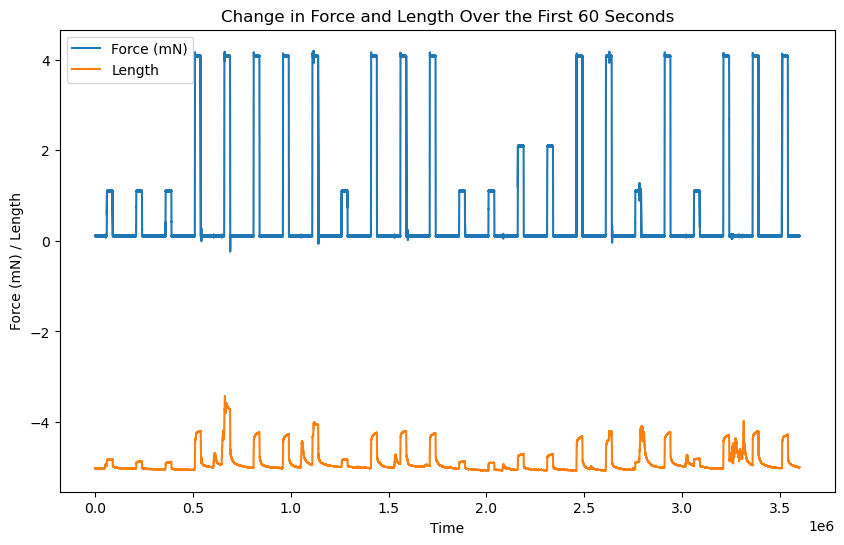

In [60]:
# Load and concatenate the npy files
concatenated_data = np.concatenate([np.load(os.path.join(folderpath,file).replace('\\', '/')) for file in sorted_files], axis=1)
print(concatenated_data)


# Assuming your data has two columns: force and length
force_column = 1  # Adjust if the force data is in a different column
length_column = 0  # Adjust if the length data is in a different column

# Extract force and length data from the concatenated array
force_data = concatenated_data[force_column,:]
length_data = concatenated_data[length_column,:]

print(force_data)

# Sample rate (assuming data is sampled regularly)
sample_rate = 30000  # Adjust based on your actual sample rate

# Calculate the number of data points corresponding to the first 20 seconds
num_points_60_seconds = int(120 * sample_rate)

# Plot the change in force and length for the first 20 seconds
time_steps = np.arange(num_points_60_seconds)

plt.figure(figsize=(10, 6))
plt.plot(time_steps, force_data[:num_points_60_seconds], label='Force (mN)')
plt.plot(time_steps, length_data[:num_points_60_seconds], label='Length')
plt.xlabel('Time')
plt.ylabel('Force (mN) / Length')
plt.title('Change in Force and Length Over the First 60 Seconds')
plt.legend()
plt.show()